# MATH 210 Introduction to Mathematical Computing

## February 26, 2016

Today's Agenda:

1. Ordinary Differential Equations
2. Approximating Solutions of ODEs with `scipy.integrate.odeint`

## 1. Odinary Differential Equations

An **ordinary differential equation** is an equation involving an unknown function $y$ and its derivatives $y'$, $y''$, $y'''$, etc. The term *ordinary* implies that the unknown function is a function of one variable (usually denoted $t$) as opposed to several variables. The **order** of an ODE is the highest order derivative of $y$ appearing in the equation.

For example, the equation $y' = y$ is a first order ODE, and the equation $y''+y=t$ is a second order ODE.

### First Order ODEs

Given a first order ODE, we usually write it in the form

$$
y' = f(y,t)
$$

where the right side is some function $f$ involving $y$ and $t$.

Some first order ODEs are easy to solve. For example, the general solution of $y' = y$ is $y(t) = Ce^{t}$ where $C$ is a constant.

Other ODEs are impossible to solve in closed form (ie. in terms of elementary functions). For example, the equation $y' = e^{-t^2}$ has no closed form solution since $y(t) = \int_0^t e^{-x^2} \, dx + y(0)$ and the Gaussian has no closed form solution.

## 2. Using `scipy.integrate.odeint`

SciPy's main ODE solver is `scipy.integrate.odeint` and is based on an established FORTRAN library. Let's import all the necessary packages and then look at the documentation for `odeint`.

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spi.odeint?

From the documentation, we see that we first need to define a function `f` which gives $f(y,t)$ on the right hand side of our ODE. The first three mandatory inputs are then the function `f`, initial condition $y(t_0)=y_0$ and an array `t` of $t$ values where the first entry in `t` is $t_0$.F Finally, the return value of `odeint` (for scalar ODEs) is simply the array `y` of $y$ values corresponding to the $t$ values in the array `t`.

**Example.** Let's use `odeint` to approximate the solution of $y'=y$ with $y(0)=1$ over the interval $[0,2]$. Let's plot the result and compare it to the true solution $y=e^t$.

First, we need to define the function `f` appearing on the right side of the equation which is $f(y,t) = y$, and then we input `f`, the initial condition `y0` and the array of $t$ values `t`.

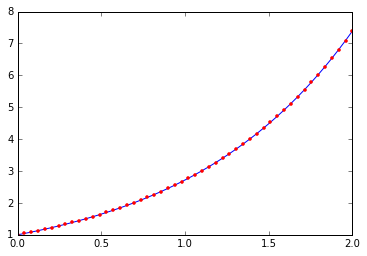

In [28]:
# Right side of ODE y' = y
def f(y,t):
    return y

# Initial condition
y0 = 1

# Array of t values over interval [0,2]
t = np.linspace(0,2,50)

# Compute the approximation
y = spi.odeint(f,y0,t)

# Compute values of the true solution y = e^t
y1 = np.exp(t)

# Plot the approximation y along with the true solution y1 (as red dots)
plt.plot(t,y,t,y1,'r.')
plt.show()

The approximation looks pretty close to the true solution!

**Example.** Use `odeint` to plot an approximation of $y'=y^2-t$ for $y(0)=0$ over the interval $[0,1]$.

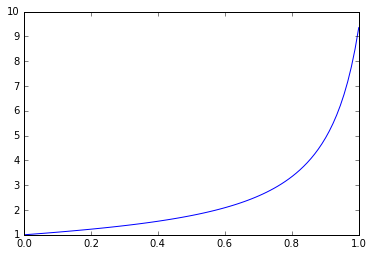

In [5]:
def f(y,t):
    return y**2 - t

y0 = 1
t = np.linspace(0,1,92)
y = spi.odeint(f,y0,t)

plt.plot(t,y)
plt.show()

Now let's plot solutions for various initial conditions $y(0)=-20,-19, \dots, -1, 0, 0.1, 0.2, \dots, 1$.

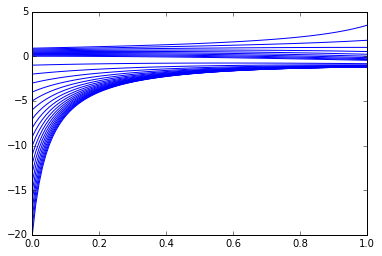

In [6]:
def f(y,t):
    return y**2 - t

t = np.linspace(0,1,100)

for y0 in range(-20,0):
    y = spi.odeint(f,y0,t)
    plt.plot(t,y,'b')

for y0 in np.arange(0,1,0.1):
    y = spi.odeint(f,y0,t)
    plt.plot(t,y,'b')

plt.show()

**Example.** Plot an approximation to the solution of the equation $y' = \frac{e^{-t^2}}{\sqrt{\pi}}$ with $y(0) = 1/2$ over the interval $[-3,3]$.

To plot over the interval $[-3,3]$ given the initial condition at $t=0$, we can solve for both interval $[-3,0]$ and $[0,3]$ and the plot the two results together.

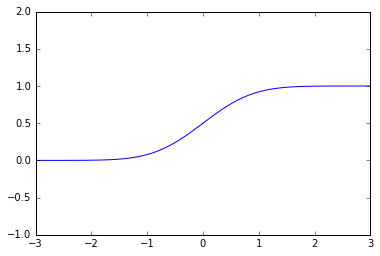

In [7]:
def f(y,t):
    return np.exp(-t**2) / np.sqrt(np.pi)

y0 = 0.5

t = np.linspace(0,3,1000)

y1 = spi.odeint(f,y0,t)
y2 = spi.odeint(f,y0,-t)

plt.plot(t,y1,'b',-t,y2,'b')
plt.ylim([-1,2])

plt.show()

## 3. Exercises

**Exercise.** Use `odeint` to plot an approximation of the solution of $y' = \sin y$ for $t \in [0,5]$ for several initial conditions $y(0) = -5, -4, \dots , 3, 4, 5$.

**Exercise.** Use `odeint` to plot an approximation of the solution of $y'=yt$ for $y(-3)=1$ for $t \in [-3,3]$ and compare it to the true solution.

**Exercise.** Use `odeint` to plot an approximation of the solution of $y' = y + t^2$ over the interval $t \in [0,3]$ for $y(0)=-1$.